In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
Data = pd.read_csv('./covid19_de_tuebingen.csv', sep = ';')
Data.head()

In [48]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

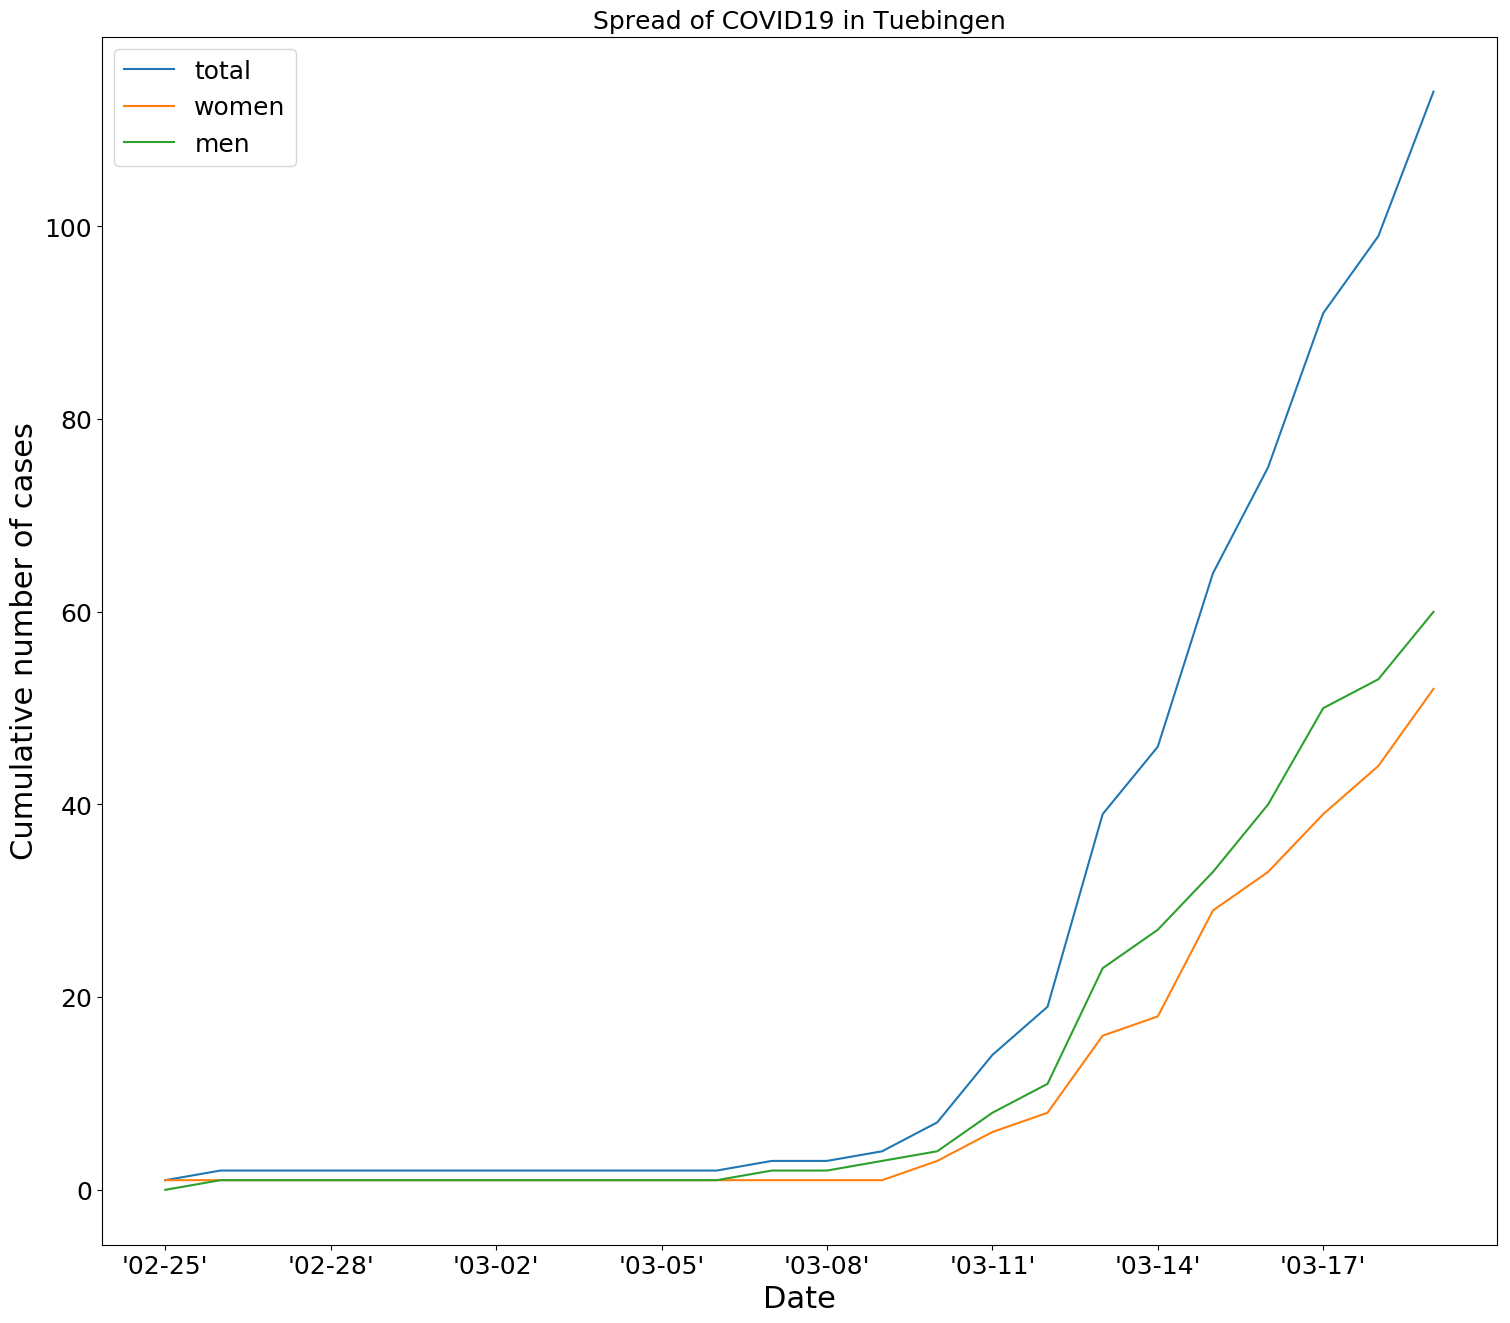

In [53]:
fig, ax = plt.subplots(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(Data.date, Data.totalcase, label="total")
ax.plot(Data.date, Data.totalF, label="women")
ax.plot(Data.date, Data.totalM, label="men")

ax.set_ylabel('Cumulative number of cases')
ax.set_xlabel('Date')
ax.set_xticks(np.arange(0, 24, step=3))
ax.set_title('Spread of COVID19 in Tuebingen')
ax.legend()

plt.show()